<h4 align ='center'>Kushagra Singh | Infosys Project</h4>
<h4 align ='center'>Using MNIST Dataset and MLP, CNN & LeNet5 models</h4>
<br>

In [4]:
%pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision
from torchvision import datasets

dataset = torchvision.datasets.MNIST(root='./data', download=True)

print(f"Dataset size: {len(dataset)}")
print(f"First data point (image, label): {dataset[0]}")

Dataset size: 60000
First data point (image, label): (<PIL.Image.Image image mode=L size=28x28 at 0x1FA2FBE29C0>, 5)


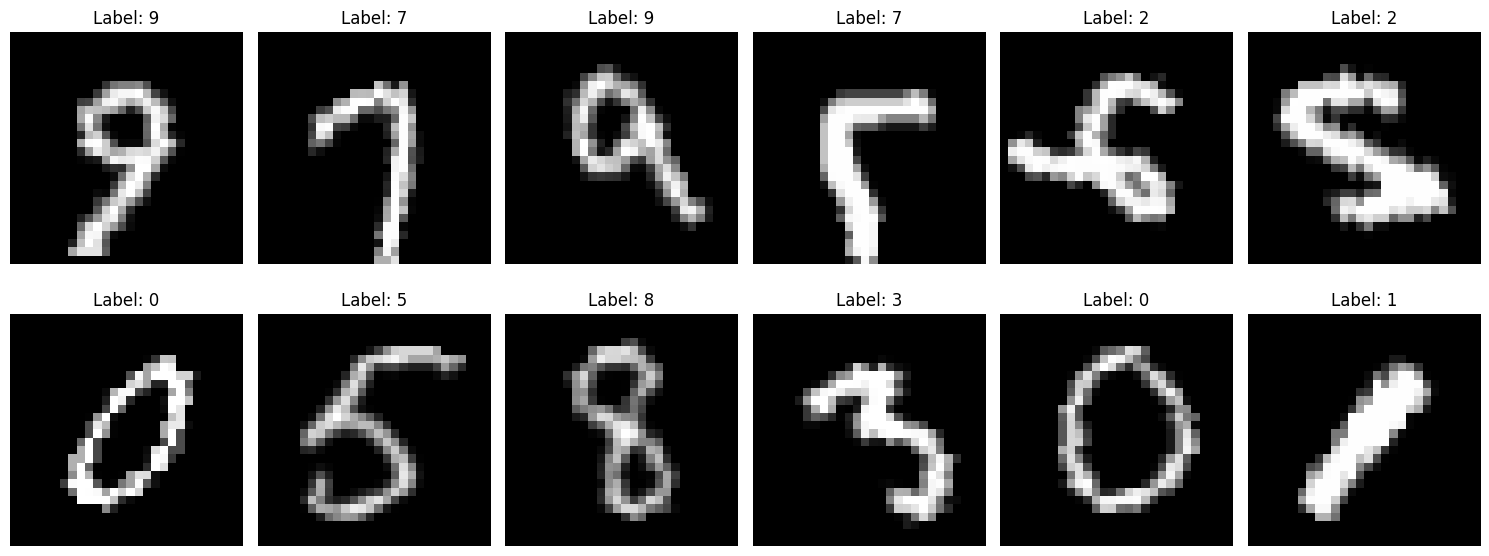

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as T

#to customize data visualization
data_transforms = T.Compose([
    T.RandomRotation(degrees=30),
    T.RandomHorizontalFlip(),
    T.RandomResizedCrop(size=28, scale=(0.9, 1.0)),
    T.ToTensor(),
    T.Normalize(mean=(0.5,), std=(0.5,)),
])

#load
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=data_transforms, download=True)
mnist_dataloader = DataLoader(mnist_dataset, batch_size=60, shuffle=True)

#viz representation changes
def plot_image_grid(images, labels, num_rows=2, num_cols=6):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
    axes = axes.flatten()
    
    for idx in range(num_rows*num_cols):
        if idx < len(images):
            axes[idx].imshow(images[idx].squeeze(), cmap='gray')
            axes[idx].set_title(f'Label: {labels[idx]}')
        axes[idx].axis('off')    
    plt.tight_layout()
    plt.show()

#batch of images and labels
data_iterator = iter(mnist_dataloader)
batch_images, batch_labels = next(data_iterator)

#visualize batch of images
plot_image_grid(batch_images, batch_labels)
